In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset-netflix-shows-updated/netflix_data_updated.csv


***First Get Data***

In [2]:
df=pd.read_csv('/kaggle/input/dataset-netflix-shows-updated/netflix_data_updated.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020.0,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021.0,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021.0,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021.0,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021.0,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


***Check Data Types***

In [3]:
df.dtypes

show_id          object
type             object
title            object
director         object
cast             object
country          object
date_added       object
release_year    float64
rating           object
duration         object
listed_in        object
description      object
dtype: object

***Check Null Values***

In [4]:
df.isnull().sum()

show_id            0
type              40
title              1
director        1883
cast             495
country          663
date_added         1
release_year       1
rating             1
duration           1
listed_in          1
description        1
dtype: int64

# Cleaning Qs

****Q1.**** ***yes > show_id column is important***

****Q2.**** ***fill missing values in type column with 100% accuracy of filling***

In [5]:
df['type']=df['type'].fillna(df['duration'].apply(lambda x: 'Movie' if 'min' in str(x) else 'TV Show'))
df.isnull().sum()

show_id            0
type               0
title              1
director        1883
cast             495
country          663
date_added         1
release_year       1
rating             1
duration           1
listed_in          1
description        1
dtype: int64

****Q3.**** ***Identify the three columns with the most missing values***

In [6]:
df.isnull().sum().sort_values(ascending=False).head(3)

director    1883
country      663
cast         495
dtype: int64

****Q3.**** ***replace missing values and make sure it replaced***

In [7]:
df['director']=df['director'].fillna('UnKnown')
df['country']=df['country'].fillna('UnKnown')
df['cast']=df['cast'].fillna('UnKnown')
df.isnull().sum()

show_id         0
type            0
title           1
director        0
cast            0
country         0
date_added      1
release_year    1
rating          1
duration        1
listed_in       1
description     1
dtype: int64

****Q4.**** ***Clean the date_added Column***

In [8]:
df['date_added']=df['date_added'].fillna('UnKnown')
df['date_added']=pd.to_datetime(df['date_added'],errors='coerce')

****Q4.**** ***generate year_added and month_added Columns and ckech they generated***

In [9]:
df['year_added']=df['date_added'].dt.year
df['month_added']=df['date_added'].dt.month_name()
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,UnKnown,United States,2021-09-25,2020.0,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,September
1,s2,TV Show,Blood & Water,UnKnown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021.0,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,September
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",UnKnown,2021-09-24,2021.0,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,September
3,s4,TV Show,Jailbirds New Orleans,UnKnown,UnKnown,UnKnown,2021-09-24,2021.0,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,September
4,s5,TV Show,Kota Factory,UnKnown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021.0,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,September


****Q5.**** ***Generate season Column***

In [10]:
def season(month):
    if month in ['June','July','August']:
        return 'Summer'
    if month in ['September','October','November']:
        return 'Fall'
    if month in ['December','January','February']:
        return 'Winter'
    if month in ['March','April','May']:
        return 'Spring'
    else:
        return 'UnKnown'

df['season']=df['month_added'].apply(season)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,season
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,UnKnown,United States,2021-09-25,2020.0,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,September,Fall
1,s2,TV Show,Blood & Water,UnKnown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021.0,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,September,Fall
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",UnKnown,2021-09-24,2021.0,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,September,Fall
3,s4,TV Show,Jailbirds New Orleans,UnKnown,UnKnown,UnKnown,2021-09-24,2021.0,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,September,Fall
4,s5,TV Show,Kota Factory,UnKnown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021.0,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,September,Fall


# Analysis Qs

***first Change data type of year_added Column to int and check it occurs***

In [11]:
df['year_added'] = df['year_added'].astype('Int64')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,season
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,UnKnown,United States,2021-09-25,2020.0,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,September,Fall
1,s2,TV Show,Blood & Water,UnKnown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021.0,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,September,Fall
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",UnKnown,2021-09-24,2021.0,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,September,Fall
3,s4,TV Show,Jailbirds New Orleans,UnKnown,UnKnown,UnKnown,2021-09-24,2021.0,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,September,Fall
4,s5,TV Show,Kota Factory,UnKnown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021.0,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,September,Fall


****Q1.**** ***Return single value that represents the most Common year_added***

In [12]:
df['year_added'].mode()[0]

2020

****Q2.**** ***Return value that represents the most Common rating***

In [13]:
df['rating'].mode()[0]

'TV-MA'

# Visualization Qs

****Q1.**** ***Calculate the percentage of Movies and TV Shows***

In [14]:
counts=(df['type'].value_counts(normalize=True)*100).round(2)
counts

type
Movie      64.17
TV Show    35.81
TV Sh       0.02
Name: proportion, dtype: float64

****Q1.**** ***As we show we found TV Sh and that not normal so we need to modify string format to right format***

In [15]:
df['type']=df['type'].replace({'TV Sh':'TV Show'})
counts=(df['type'].value_counts(normalize=True)*100).round(2)
counts

type
Movie      64.17
TV Show    35.83
Name: proportion, dtype: float64

****Q1.**** ***Visualize the percentage***

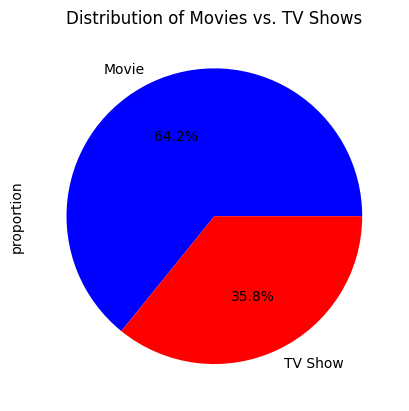

In [16]:
counts.plot(kind='pie',colors=['blue','red'],autopct='%1.1f%%')
plt.title('Distribution of Movies vs. TV Shows')
plt.show()

****Q2.**** ***Show which country produce the most content***

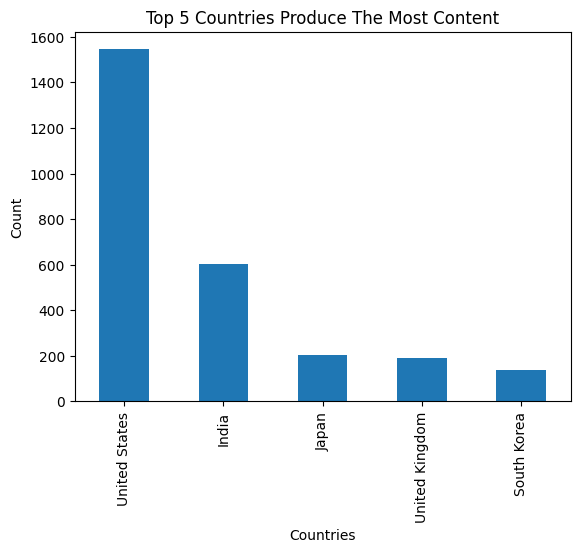

In [17]:
counts=df['country'][df['country']!='UnKnown'].value_counts().head(5)
counts.plot(kind='bar')
plt.title('Top 5 Countries Produce The Most Content')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.show()

****Q3.**** ***Show the top 10 most ratings***

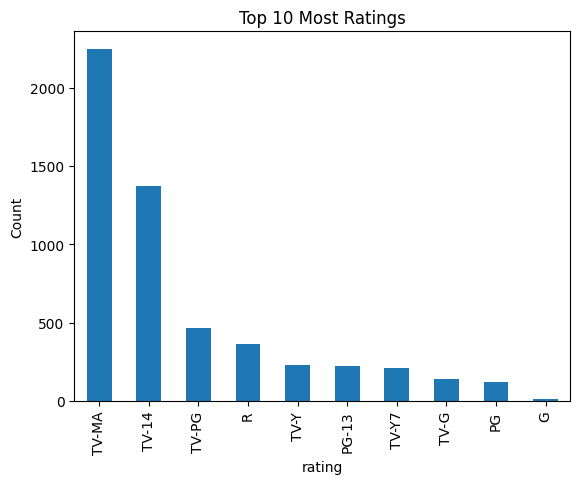

In [18]:
counts=df['rating'].value_counts().head(10)
counts.plot(kind='bar')
plt.title('Top 10 Most Ratings')
plt.ylabel('Count')
plt.show()

****Q4.**** ***Show the top 10 directors***

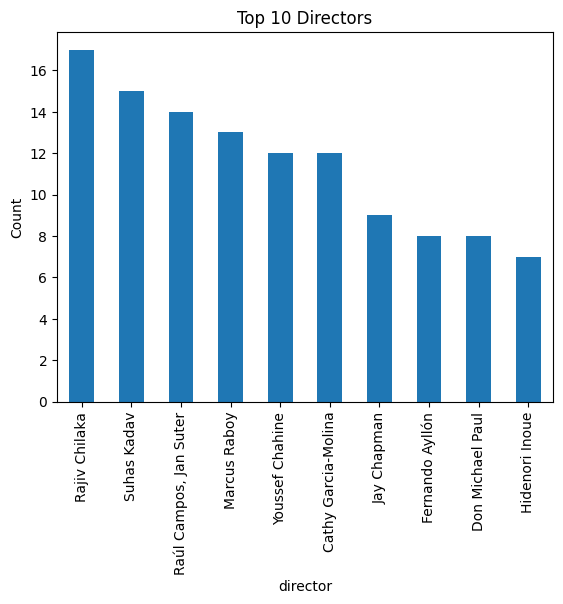

In [19]:
counts=df['director'][df['director']!='UnKnown'].value_counts().head(10)
counts.plot(kind='bar')
plt.title('Top 10 Directors')
plt.ylabel('Count')
plt.show()

****Q5.**** ***Visualize the duration of TV Show***

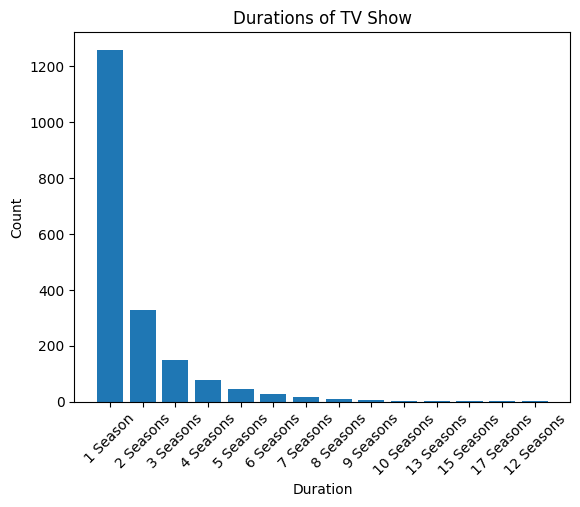

In [20]:
tv_shows=df[df['type']=='TV Show']
durations=tv_shows['duration'].value_counts()
plt.bar(durations.index,durations.values)
plt.title('Durations of TV Show')
plt.xlabel('Duration')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Bonus Qs

****Q1.**** ***Generate actor1 and actor2 columns from cast column and check it done***

In [21]:
df['actor1'] = df['cast'].apply(lambda x: x.split(', ')[0] if pd.notna(x) else 'UnKnown')
df['actor2'] = df['cast'].apply(lambda x: x.split(', ')[1] if pd.notna(x) and len(x.split(', ')) > 1 else 'UnKnown')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,season,actor1,actor2
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,UnKnown,United States,2021-09-25,2020.0,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,September,Fall,UnKnown,UnKnown
1,s2,TV Show,Blood & Water,UnKnown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021.0,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,September,Fall,Ama Qamata,Khosi Ngema
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",UnKnown,2021-09-24,2021.0,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,September,Fall,Sami Bouajila,Tracy Gotoas
3,s4,TV Show,Jailbirds New Orleans,UnKnown,UnKnown,UnKnown,2021-09-24,2021.0,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,September,Fall,UnKnown,UnKnown
4,s5,TV Show,Kota Factory,UnKnown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021.0,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,September,Fall,Mayur More,Jitendra Kumar


****Q2.**** ***Visualize the top 10 first actors based on their appearances in Movies / TV Shows***

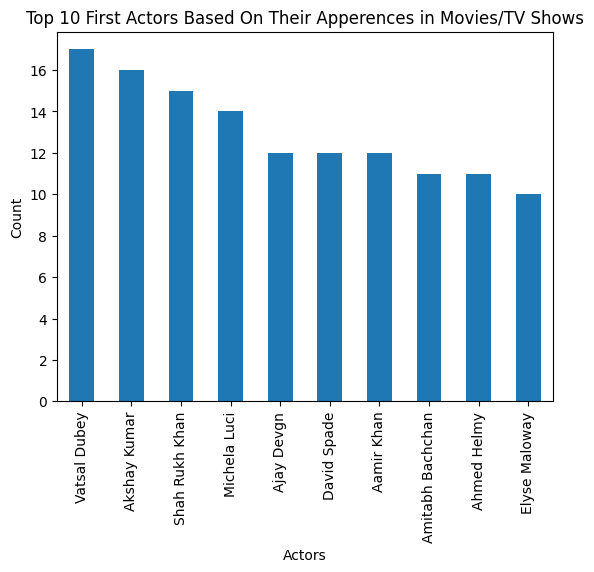

In [22]:
counts=df['actor1'][df['actor1']!='UnKnown'].value_counts().head(10)
counts.plot(kind='bar')
plt.title('Top 10 First Actors Based On Their Apperences in Movies/TV Shows')
plt.xlabel('Actors')
plt.ylabel('Count')
plt.show()

****Q3.**** ***Visualize the top 10 first actors based on their appearances in Movies / TV Shows***

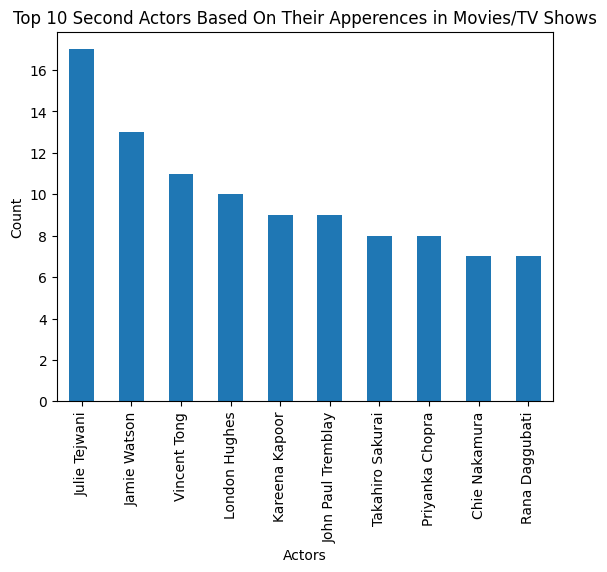

In [23]:
counts=df['actor2'][df['actor2']!='UnKnown'].value_counts().head(10)
counts.plot(kind='bar')
plt.title('Top 10 Second Actors Based On Their Apperences in Movies/TV Shows')
plt.xlabel('Actors')
plt.ylabel('Count')
plt.show()